In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### NOMINAL AND REAL GDP IN SPAIN ###

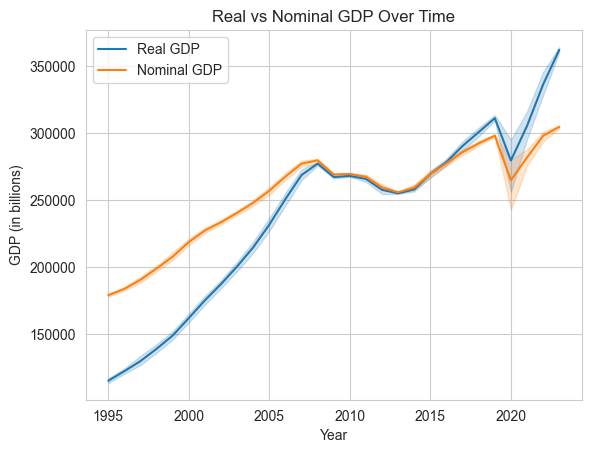

In [29]:
nom_gdp = pd.read_csv(
	'https://www.econdb.com/api/series/GDPES/?format=csv&token=b16dd00e80fab104e4e9109c2c7e681e4f0b59fa',
	index_col='Date', parse_dates=['Date'])


real_gdp = pd.read_csv(
	'https://www.econdb.com/api/series/RGDPES/?format=csv&token=c9a2a2339603ec44ecb1ee8f6cea88f510a3fd2d',
	index_col='Date', parse_dates=['Date'])


gdp_df = pd.merge(nom_gdp, real_gdp, on='Date', how='inner')


gdp_df["Date"] = gdp_df.index.year

yearly_gdp = pd.DataFrame(gdp_df.groupby(gdp_df['Date'])['GDPES'].agg('last'))

yearly_gdp["GDP change"] = cleaning_script.calc_change(yearly_gdp["GDPES"])

yearly_gdp["RGDPES"]= gdp_df.groupby(gdp_df['Date'])['RGDPES'].agg('last')

yearly_gdp["RGDP change"] = cleaning_script.calc_change(yearly_gdp["RGDPES"])

yearly_gdp.dropna()

# Visualization 

sns.set_style("whitegrid")

sns.lineplot(gdp_df, x="Date",  y="GDPES", label='Real GDP' )
sns.lineplot(gdp_df, x = "Date", y="RGDPES", label='Nominal GDP')

plt.title('Real vs Nominal GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')

plt.legend()
plt.show()


### IBEX 35 PERFORMANCE ###

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


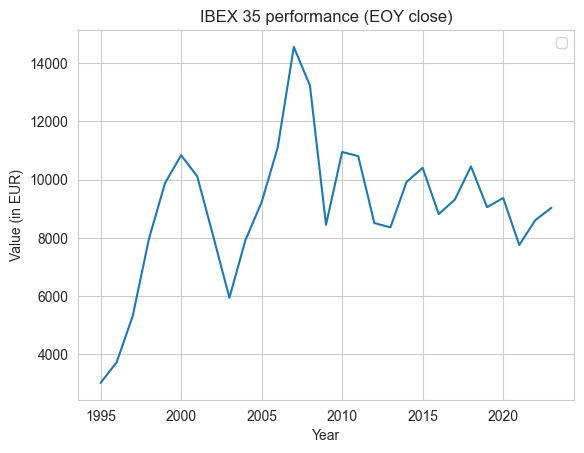

In [30]:
ibex = pd.read_csv("/Users/victorbescos/Data_analysis/projects/project_2/src/Datos históricos IBEX 35 (1).csv", decimal=',')

ibex.drop(["Apertura", "Máximo", "Mínimo", "Vol.", "% var."], axis = 1, inplace = True)

ibex['Close'] = ibex['Último'].str.replace('.', '').str.replace(',', '.').astype(float)

ibex['Date'] = pd.to_datetime(ibex['Fecha'])

yearly_close = ibex.groupby(ibex['Date'].dt.year)['Close'].agg('last').reset_index()


# Visualization 

sns.lineplot(yearly_close, x = "Date", y = "Close")

plt.title('IBEX 35 performance (EOY close)')
plt.xlabel('Year')
plt.ylabel('Value (in EUR)')

plt.legend()
plt.show()

In [ ]:
yearly_close["change"] = cleaning_script.calc_change(yearly_close["Close"])

yearly_close.dropna()

### NOMINAL AND REAL (ADJUSTED) WAGES ###

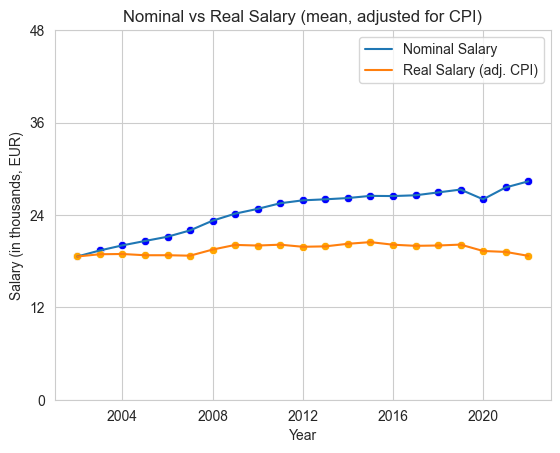

In [89]:
# clean and transform salary data

salary = pd.read_csv("/Users/victorbescos/Data_analysis/projects/project_2/src/salaries.csv")

salary[['Year', 'Salary']] = salary["Year;Av. salary "].str.split(';', expand=True)

salary = salary.drop("Year;Av. salary ", axis = 1)

salary["Salary"] = pd.to_numeric(salary['Salary'])

salary["Year"] = pd.to_numeric(salary["Year"]).sort_values()

salary.sort_index(ascending=True, inplace=True)


# add CPI data, create df with nominal vs real salary

ipc = pd.read_csv(
            'https://www.econdb.com/api/series/CPIES/?format=csv&token=056e389202cbd11e217d8de0ca8c388dcba19d50',
            index_col='Date', parse_dates=['Date'])

ipc["CPIES"] = pd.to_numeric(ipc["CPIES"])

ipc["Year"] = ipc.index.year

baseline_year = 2002

yearly_cpi = ipc.groupby(ipc['Year'])['CPIES'].agg('last').reset_index()

baseline_cpi = yearly_cpi.loc[yearly_cpi['Year'] == baseline_year, 'CPIES'].values[0]

yearly_cpi['CPI to Baseline'] = (yearly_cpi['CPIES'] / baseline_cpi) * 100

adjusted_wages = pd.merge(salary, yearly_cpi, on='Year', how='inner')

adjusted_wages['Real Salary'] = (adjusted_wages['Salary'] / adjusted_wages['CPI to Baseline']) * 100

adjusted_wages["Year"] = pd.to_datetime(adjusted_wages["Year"], format = "%Y").dt.year

adjusted_wages["Year"] = pd.to_datetime(adjusted_wages["Year"], format = "%Y")


# visualization 

sns.lineplot(adjusted_wages, x= "Year",  y="Salary", label='Nominal Salary', linestyle='-')
sns.lineplot(adjusted_wages, x = "Year", y="Real Salary", label= "Real Salary (adj. CPI)", linestyle='-')

sns.scatterplot(data=adjusted_wages, x="Year", y="Salary", color='blue')
sns.scatterplot(data=adjusted_wages, x="Year", y="Real Salary", color='orange')

plt.title('Nominal vs Real Salary (mean, adjusted for CPI)')
plt.xlabel('Year')
plt.ylabel('Salary (in thousands, EUR)')

plt.yticks(range(0, 50, 12))

plt.legend()

plt.show()

### GDP GROWTH VS REAL AVERAGE SALAR GROWTH ###

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


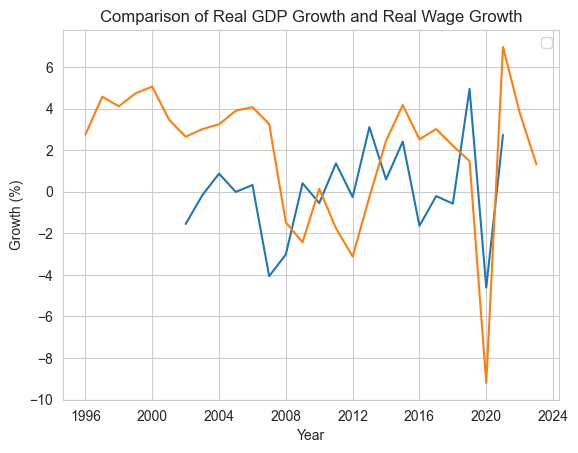

In [118]:
adjusted_wages["Real % Change"] = cleaning_script.calc_change(adjusted_wages["Real Salary"])


adjusted_wages.dropna()

yearly_gdp["Year"] = yearly_gdp.index

yearly_gdp["Year"] = pd.to_datetime(yearly_gdp["Year"], format = "%Y")


#visualization

sns.lineplot(adjusted_wages, x = "Year", y = "Real % Change")
sns.lineplot(x= yearly_gdp["Year"], y = yearly_gdp["RGDP change"])

plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.title('Comparison of Real GDP Growth and Real Wage Growth')
plt.legend()
plt.grid(True)

